# Solution Notebook

In [1]:
import numpy as np                             
import pandas as pd                             
import matplotlib.pyplot as plt                             
import seaborn as sns
import os
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import PowerTransformer, OneHotEncoder


In [2]:
# marketing = pd.read_excel('data/marketing_campaign.xslx',header=0)
marketing = pd.read_excel('data/marketing_campaign.xlsx')
marketing.drop(columns='ID',inplace=True)

# Data Exploration

In [3]:
marketing.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean          27.062946  ...           5.316518      0.072768      0.074554   
std           41.280498  ...           2.426645      0.259813      0.262728   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.000000  ...           7.000000      0.000000      0.000000   
max          263.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

In [4]:
marketing['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [5]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

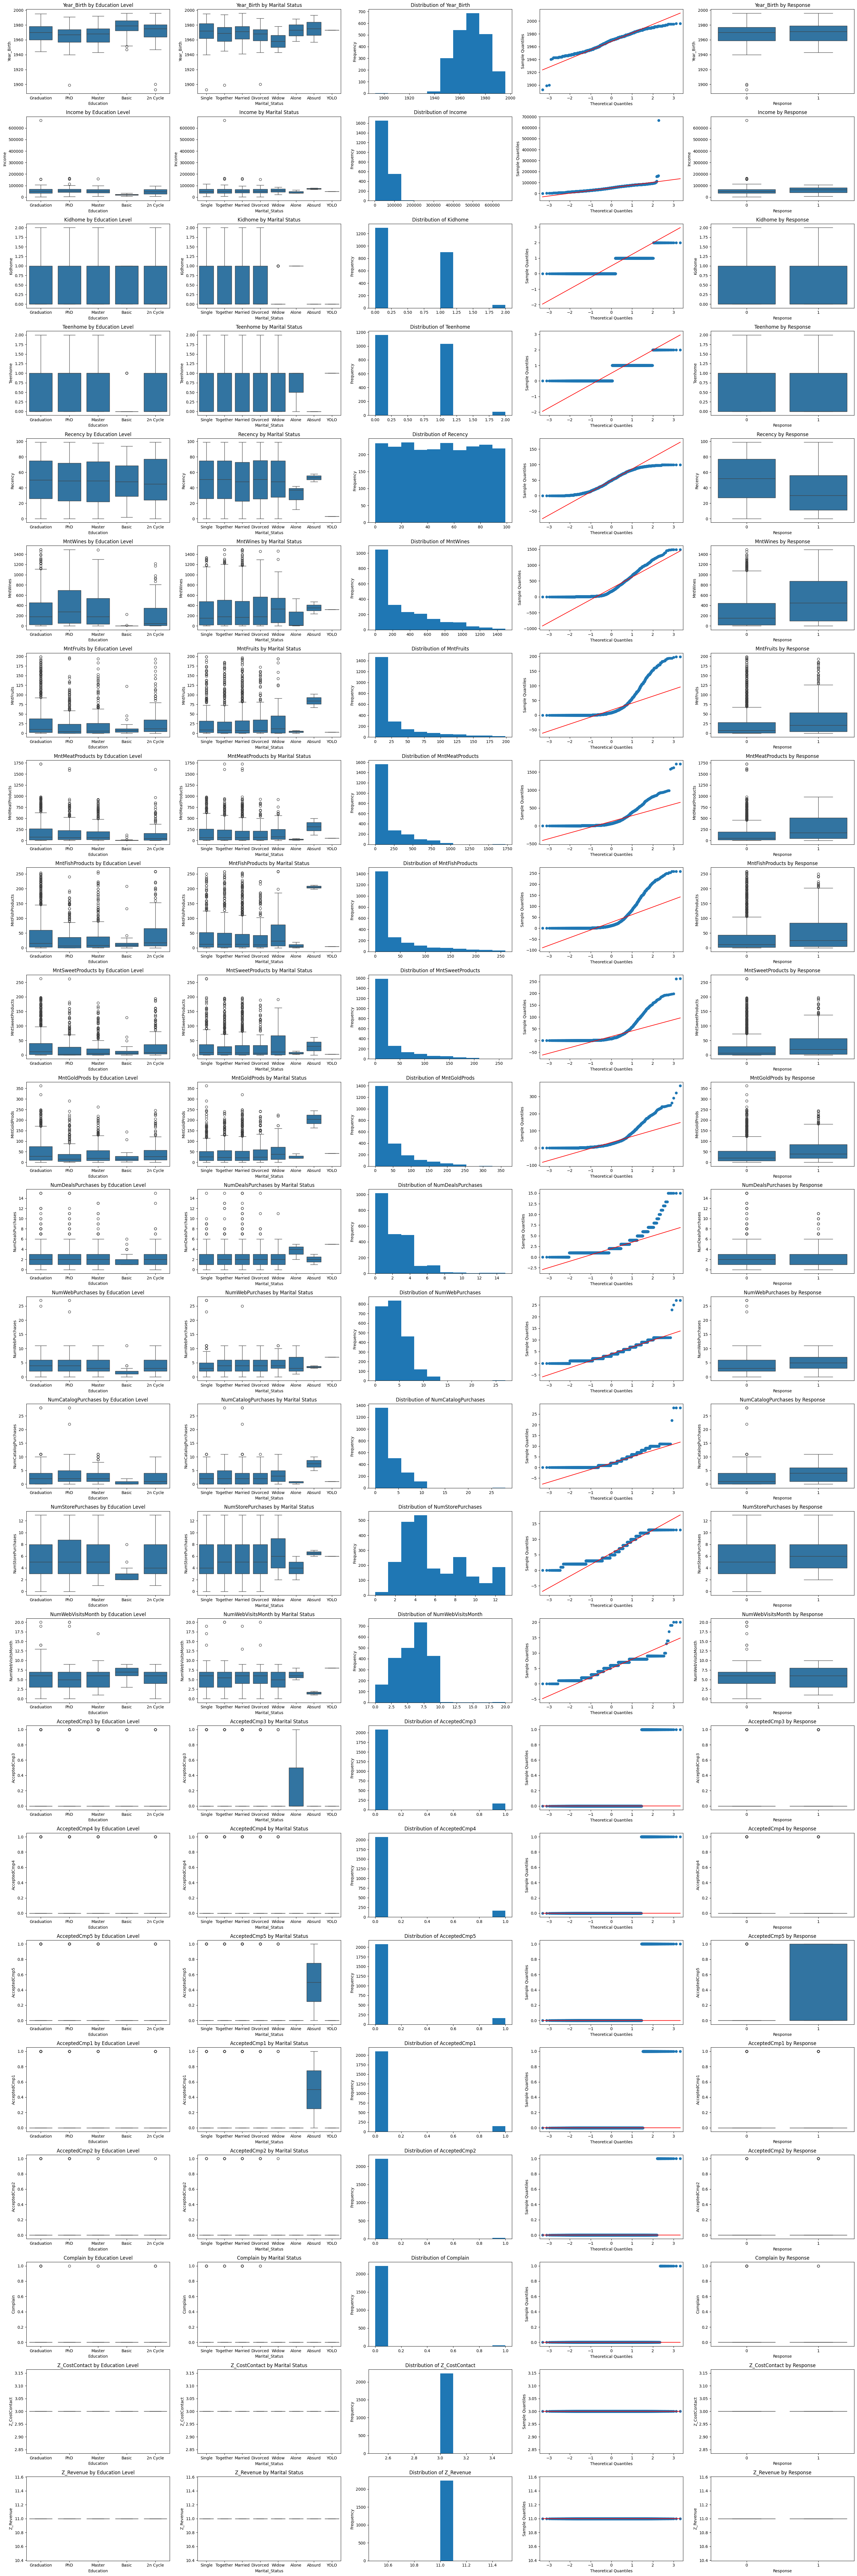

In [6]:
def diagnostic_plots(df, target):
    num_df = df.select_dtypes(include='number')
    fig, axs = plt.subplots(ncols=5, nrows=len(num_df.columns)-1,figsize=(30,90))
    row = 0
    for col in num_df:
        if col == target:
            continue
        # Boxplot by Education
        sns.boxplot(num_df, x=df['Education'], y=num_df[col], ax=axs[row,0])
        axs[row,0].set_title(f'{col} by Education Level')

        # Boxplot by Marital Status
        sns.boxplot(num_df, x=df['Marital_Status'], y=num_df[col], ax=axs[row, 1])
        axs[row,1].set_title(f'{col} by Marital Status')

        # Distribution of data
        num_df[col].plot(kind='hist',ax=axs[row,2])
        axs[row,2].set_title(f'Distribution of {col}')
        
        # Checking normality in a different way
        #stats.probplot(num_df[col],dist='norm',plot=axs[row,3])
        sm.qqplot(num_df[col], line='q',ax=axs[row, 3])

        # Boxplot var against response
        sns.boxplot(num_df, x=df['Response'], y=num_df[col], ax=axs[row,4])
        axs[row,4].set_title(f'{col} by Response')
        row += 1
    plt.tight_layout()
    plt.show()

diagnostic_plots(marketing, 'Response')

Text(0.5, 1.0, 'Correlation Plot of Numerical Variables')

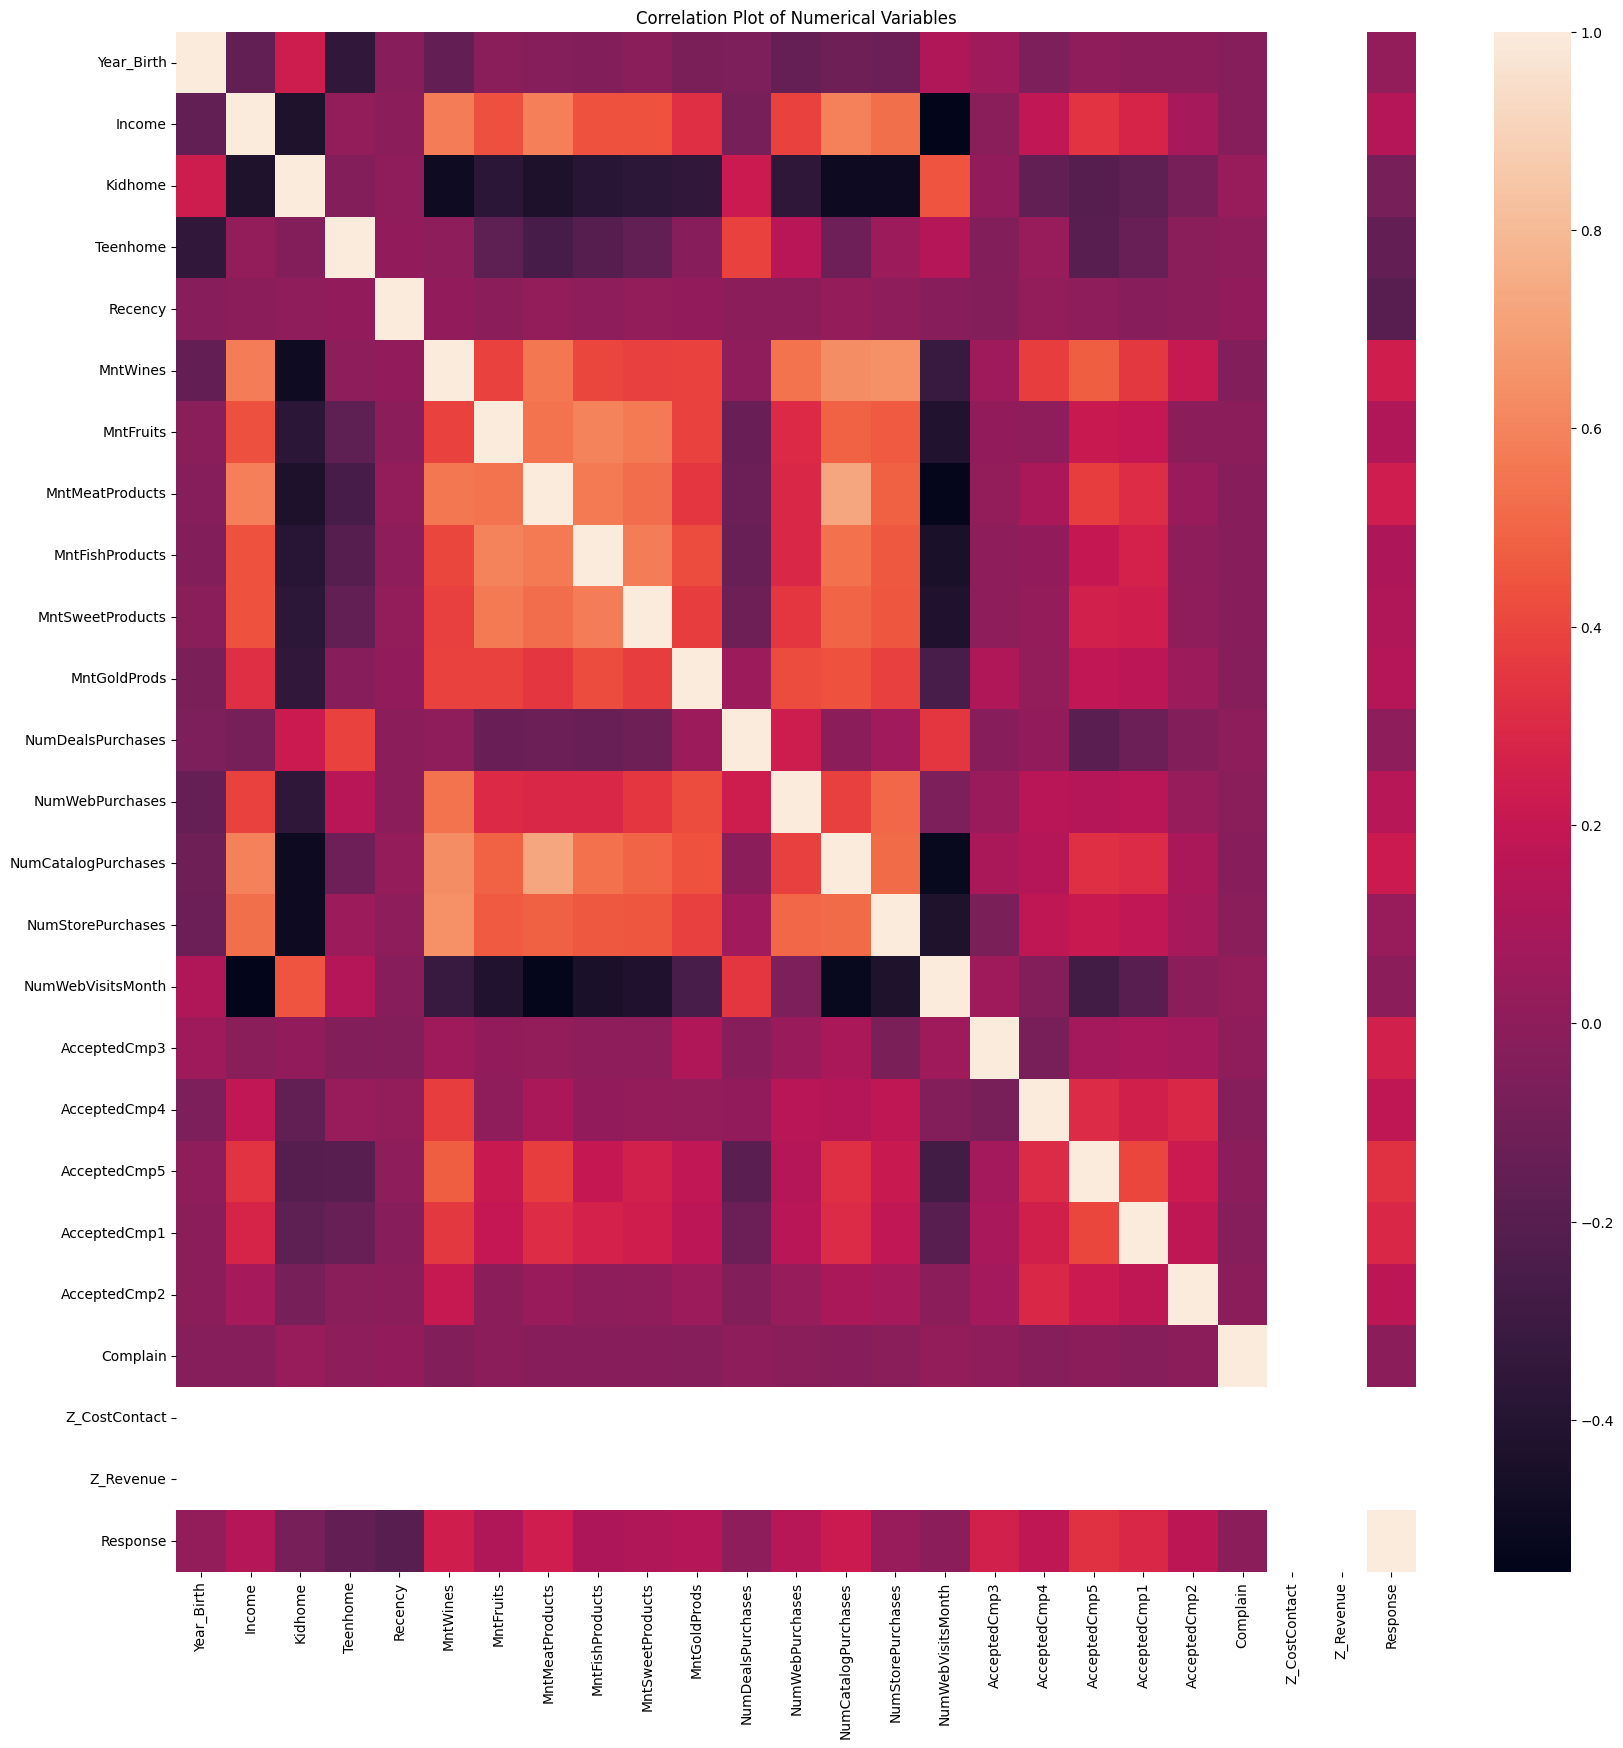

In [7]:
num_df = marketing.select_dtypes(include='number')
corr = num_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr)
plt.title('Correlation Plot of Numerical Variables')

In [8]:
marketing.Response.value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [9]:
print(f'Missing Values: {marketing.isnull().sum()}')

Missing Values: Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [10]:
len(marketing)

2240

# Data Transformation

In [11]:
# Remove redundant columns and replace missing values
marketing.drop(columns=['Z_Revenue','Z_CostContact'],inplace=True)

In [12]:
# Change data types for categorical data 
object_cols = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain']
marketing[object_cols] = marketing[object_cols].astype(object)
num_df = marketing.select_dtypes(include='number')
num_df.drop(columns='Response', inplace=True)
marketing[object_cols] = marketing[object_cols].astype(int)

In [13]:

# Outlier Removal
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    return mask

outlier_mask = remove_outliers(marketing, 'Income')
marketing.loc[outlier_mask, 'Income']= np.nan


print(f'Missing Values after Outlier Removal: \n{marketing.isnull().sum()}')
#marketing.dropna(how='any',inplace=True)
#marketing['Income'].fillna(
# print(f'Missing Values Check: \n{marketing.isnull().sum()}')
income_avg = marketing['Income'].mean(skipna=True)
marketing['Income'] = marketing['Income'].fillna(value=income_avg)

Missing Values after Outlier Removal: 
Year_Birth              0
Education               0
Marital_Status          0
Income                 32
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [14]:
# Normalization of data and Feature Scaling
marketing_copy = marketing.copy()

skew_table = pd.DataFrame(num_df.skew(),columns=['Skew'])
skewed_data = skew_table[((skew_table['Skew']<-0.5) | (skew_table['Skew']>0.5))]
skewed_columns = skewed_data.index.values[:-1]
print(f'Columns that will be transformed to follow a normal distribution:\n{skewed_columns}')
pt = PowerTransformer(method='yeo-johnson',standardize=True)

marketing_copy[skewed_columns] = pt.fit_transform(marketing[skewed_columns])
#pt.inverse_transform(marketing_copy[['Income']])
marketing_copy.head()
#marketing_copy[skewed_columns] = pt.inverse_transform(marketing_copy[skewed_columns])

Columns that will be transformed to follow a normal distribution:
['Income' 'Kidhome' 'MntWines' 'MntFruits' 'MntMeatProducts'
 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds' 'NumDealsPurchases'
 'NumWebPurchases' 'NumCatalogPurchases']


Year_Birth   Education Marital_Status    Income   Kidhome  Teenhome  \
0        1957  Graduation         Single  0.341296 -0.853430         0   
1        1954  Graduation         Single -0.224523  1.138777         1   
2        1965  Graduation       Together  0.967462 -0.853430         0   
3        1984  Graduation       Together -1.222445  1.138777         0   
4        1981         PhD        Married  0.348612  1.138777         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58  1.058416   1.409083  ...             1.726361   
1  2014-03-08       38 -1.210647  -0.985243  ...            -0.373607   
2  2013-08-21       26  0.746538   1.063780  ...             0.159579   
3  2014-02-10       26 -1.210647  -0.380348  ...            -1.337974   
4  2014-01-19       94  0.124254   0.986362  ...             0.524677   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

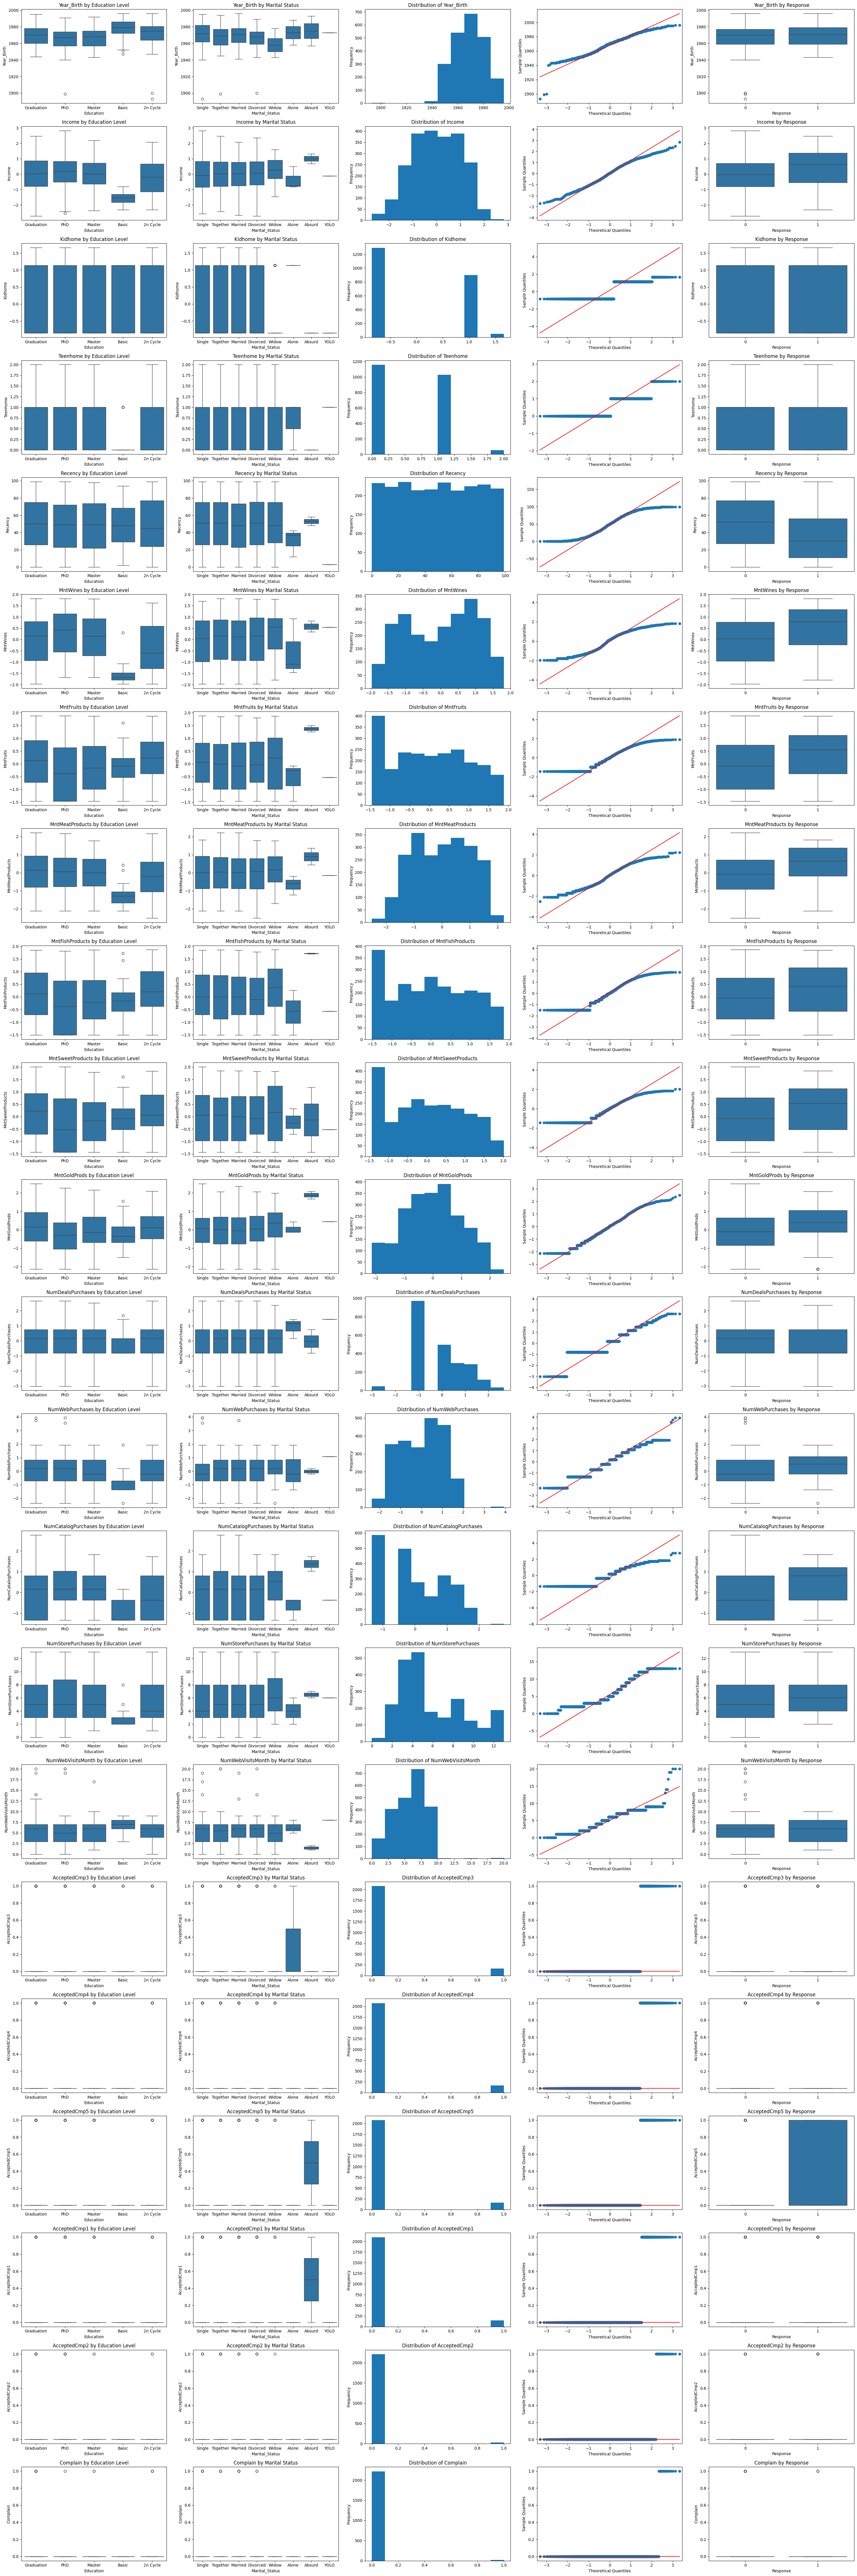

In [15]:
diagnostic_plots(marketing_copy,'Response')

In [16]:
marketing_copy['Response'].value_counts()
marketing_copy.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [17]:
# Categorical Data Consolidation
marital_status_consolidate = {
    'Together':'Married',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single'
}
education_consolidate = {
    'PhD':'Highly Educated',
    'Master':'Highly Educated',
    '2n Cycle':'Highly Educated',
    'Graduation':'Educated',
    'Basic':'Less Educated'
}
marketing_copy['Marital_Status'] = marketing_copy['Marital_Status'].replace(marital_status_consolidate)
marketing_copy['Education'] = marketing_copy['Education'].replace(education_consolidate)
marketing_copy.head()

Year_Birth        Education Marital_Status    Income   Kidhome  Teenhome  \
0        1957         Educated         Single  0.341296 -0.853430         0   
1        1954         Educated         Single -0.224523  1.138777         1   
2        1965         Educated        Married  0.967462 -0.853430         0   
3        1984         Educated        Married -1.222445  1.138777         0   
4        1981  Highly Educated        Married  0.348612  1.138777         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58  1.058416   1.409083  ...             1.726361   
1  2014-03-08       38 -1.210647  -0.985243  ...            -0.373607   
2  2013-08-21       26  0.746538   1.063780  ...             0.159579   
3  2014-02-10       26 -1.210647  -0.380348  ...            -1.337974   
4  2014-01-19       94  0.124254   0.986362  ...             0.524677   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [18]:
marketing_copy['Dt_Customer'] = pd.to_datetime(marketing_copy['Dt_Customer'],format='%Y-%m-%d')

marketing_copy['Dt_Customer_Year'] = marketing_copy['Dt_Customer'].dt.year
marketing_copy['Dt_Customer_Month'] = marketing_copy['Dt_Customer'].dt.month
# Cyclical encoding for month
# marketing_copy['month_sin'] = np.sin(2 * np.pi * marketing_copy['Dt_Customer_Month'] / 12)
# marketing_copy['month_cos'] = np.cos(2 * np.pi * marketing_copy['Dt_Customer_Month'] / 12)

# Drop original year and month columns

marketing_copy.drop(columns=['Dt_Customer'],axis=1,inplace=True)
# marketing_copy['Age'] = 2024 - marketing_copy['Year_Birth']
# marketing_copy.drop(columns='Year_Birth',inplace=True)

In [19]:
# One Hot Encoding
cat_cols = ['Dt_Customer_Year','Education','Marital_Status']
print(f'Categorical Columns are:\n{cat_cols}')
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohe_transformed = ohe.fit_transform(marketing_copy[cat_cols])
df = pd.concat([ohe_transformed, marketing_copy],axis=1).drop(columns=cat_cols,axis=1)

df.head()

Categorical Columns are:
['Dt_Customer_Year', 'Education', 'Marital_Status']


Dt_Customer_Year_2012  Dt_Customer_Year_2013  Dt_Customer_Year_2014  \
0                    1.0                    0.0                    0.0   
1                    0.0                    0.0                    1.0   
2                    0.0                    1.0                    0.0   
3                    0.0                    0.0                    1.0   
4                    0.0                    0.0                    1.0   

   Education_Educated  Education_Highly Educated  Education_Less Educated  \
0                 1.0                        0.0                      0.0   
1                 1.0                        0.0                      0.0   
2                 1.0                        0.0                      0.0   
3                 1.0                        0.0                      0.0   
4                 0.0                        1.0                      0.0   

   Marital_Status_Married  Marital_Status_Single  Year_Birth    Income  ...  \
0                     0.0                    1.0        1957  0.341296  ...   
1                     0.0                    1.0        1954 -0.224523  ...   
2                     1.0                    0.0        1965  0.967462  ...   
3                     1.0                    0.0        1984 -1.222445  ...   
4                     1.0                    0.0        1981  0.348612  ...   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   

   Dt_Customer_Month  
0                  9  
1                  3  
2                  8  
3                  2  
4                  1  

[5 rows x 32 columns]

# Machine Learning Models
## Logistic Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import statsmodels.api as sm

In [21]:
marketing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   float64
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   float64
 8   MntFruits            2240 non-null   float64
 9   MntMeatProducts      2240 non-null   float64
 10  MntFishProducts      2240 non-null   float64
 11  MntSweetProducts     2240 non-null   float64
 12  MntGoldProds         2240 non-null   float64
 13  NumDealsPurchases    2240 non-null   float64
 14  NumWebPurchases      2240 non-null   float64
 15  NumCatalogPurchases  2240 non-null   f

1792 data points used for training model
448 data points used for testing model
Accuracy: 0.8883928571428571
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       368
           1       0.84      0.46      0.60        80

    accuracy                           0.89       448
   macro avg       0.87      0.72      0.77       448
weighted avg       0.88      0.89      0.87       448



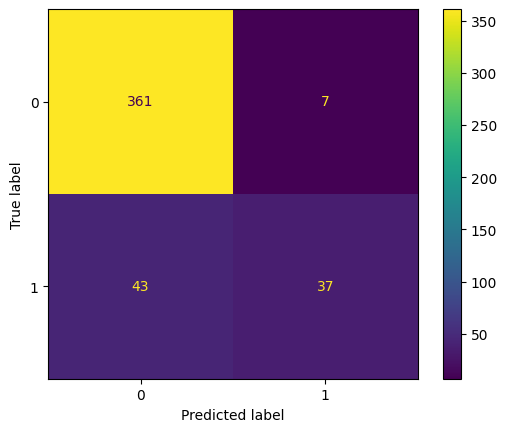

In [22]:
X = df.drop(columns='Response',axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(f'{len(X_train)} data points used for training model')
print(f'{len(X_test)} data points used for testing model')
model = LogisticRegression(solver='liblinear',random_state=0,max_iter=100)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(X_train,y_train)

# make predictions
y_pred = model.predict(X_test)

# Evaluate performance 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

cm =confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,y_pred))

<Axes: ylabel='Feature'>

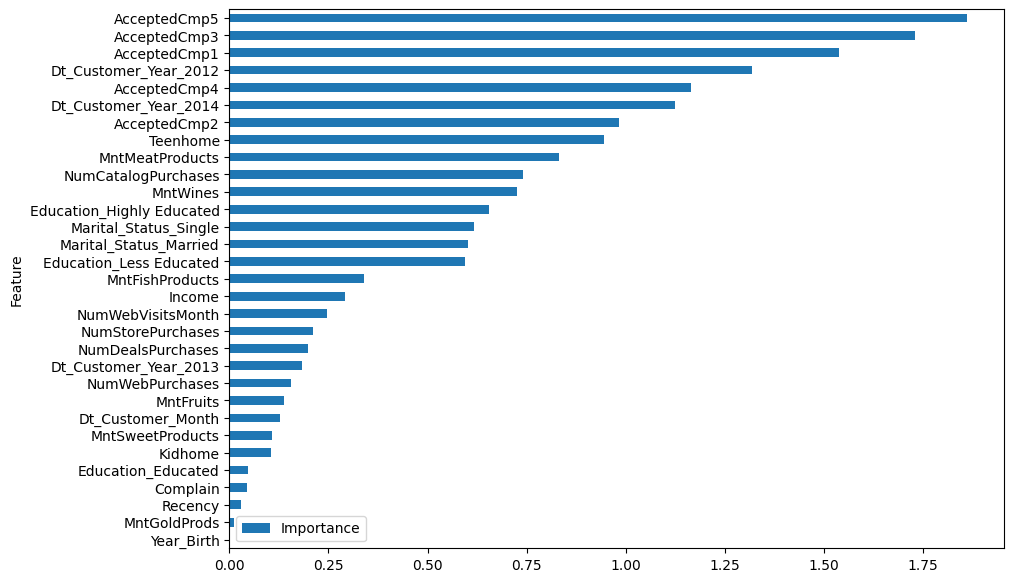

In [23]:
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance':avg_importance})
feature_importance = feature_importance.sort_values('Importance',ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10,7))

Optimization terminated successfully.
         Current function value: 0.236004
         Iterations 8


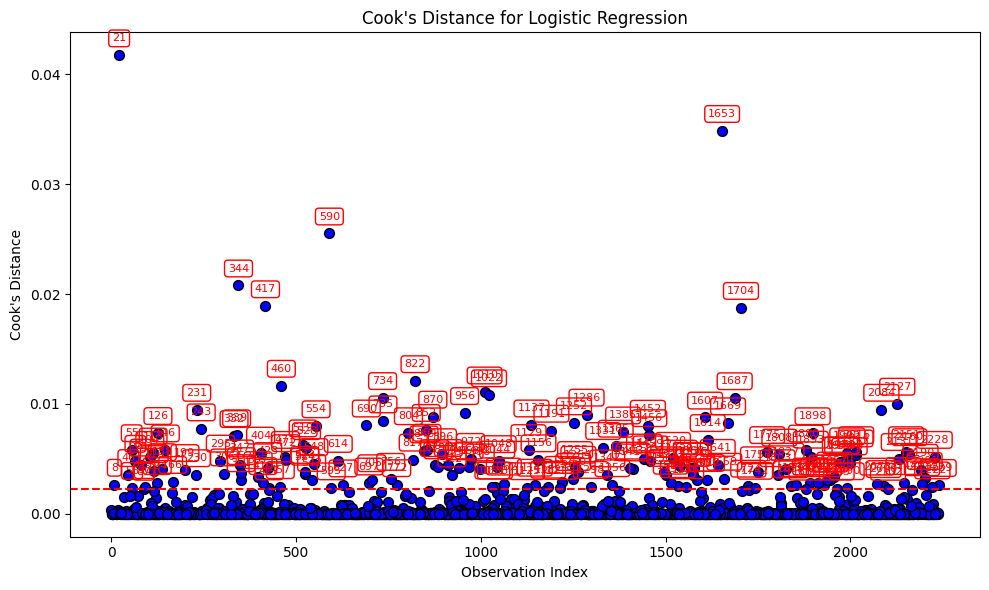

In [24]:
model = sm.Logit(y_train, X_train).fit()
# Get the influence measures
influence = model.get_influence()

# Cook's distance
cooks_d = influence.cooks_distance[0]
influential_points = np.where(cooks_d > 4 / len(X_train))[0]
threshold = 4 / len(X_train)
# Plot Cook's distance

plt.figure(figsize=(10, 6))
plt.scatter(X_train.index, cooks_d, color='blue',s=50,edgecolor='k',label='Data points')
for i in influential_points:
    plt.annotate(X_train.index[i], 
                 (X_train.index[i], cooks_d[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 color='red', 
                 fontsize=8, 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="none"))
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/n = {threshold:.2f})')

plt.title("Cook's Distance for Logistic Regression")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")

plt.tight_layout()
plt.show()

# Identify influential points


In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# model = sm.Logit(y_test, X_test).fit()
# # Get the influence measures
# influence = model.get_influence()

# # Cook's distance
# cooks_d = influence.cooks_distance[0]
# influential_points = np.where(cooks_d > 4 / len(X))[0]

# test_results = X_test.copy()
# test_results['target'] = y_test.values
# test_results['cooks_d'] = cooks_d
# test_results['influential'] = test_results.index.isin(influential_points)
# test_results.sort_index(inplace=True)
# print(test_results[test_results['influential']==True])

# # X_test = X_test.iloc[influential_points[influential_points>200]]
# # y_test = y_test.iloc[influential_points[influential_points>200]]

# SVM Model

SVM Accuracy: 0.8839285714285714
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       368
           1       0.83      0.44      0.57        80

    accuracy                           0.88       448
   macro avg       0.86      0.71      0.75       448
weighted avg       0.88      0.88      0.87       448



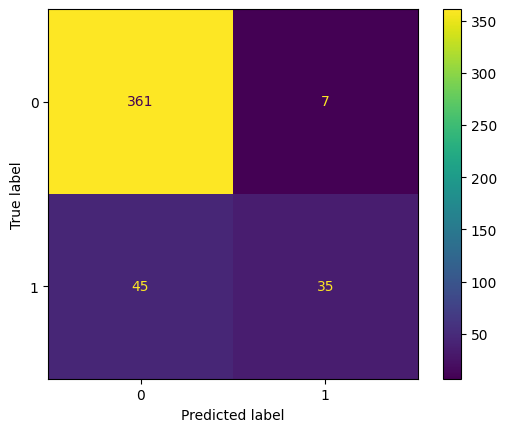

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy:',accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('clf',SVC(kernel='rbf',gamma=0.01, C=100))
               ])
print(X_train.shape)
parameters = {
    'clf__gamma':(0.01, 0.03, 0.1, 0.3,1),
    'clf__C':(0.1,0.3,1,3,10,30)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best Score:%0.3f'% grid_search.best_score_)
print('Best Parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, best_parameters[param_name])
predictions = grid_search.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

(1792, 31)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Score:0.860
Best Parameters set:
clf__C 1
clf__gamma 0.1
Accuracy: 0.8348214285714286
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       368
           1       0.75      0.11      0.20        80

    accuracy                           0.83       448
   macro avg       0.79      0.55      0.55       448
weighted avg       0.82      0.83      0.78       448

